In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,349 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and d

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#Define (str to float) & (Unit Conver)
def tofloat(Serise_) :
  for num in range(0, len(Serise_)) :
    if (str(type(Serise_[num])) != "<class 'str'>" ) : continue

    if (Serise_[num].endswith('K')) : 
      Serise_[num] = Serise_[num].replace("K","")
      Serise_[num] = float(Serise_[num])* 1000
    else :
      Serise_[num] = Serise_[num].replace("M","")
      Serise_[num] = float(Serise_[num])  * 1000000
  return Serise_

#Define (yearoveride)
def yearoveride(y, recent) :
  if (y < 100) :
    y +=2000
    if (y>recent) :
      y -= 100
  return y

def Normalize(value, df, region) : 
  value = value / df[region]
  return value

def Substr(string):
  return string[:-1]

In [2]:
#Load DataSet
path = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df_origin = pd.read_csv(path, index_col=[0])

df_origin.tail(8)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0,0,0.05,0
16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0,0,0.02,0
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


# [데이터 전처리] 연도 오류 수정 및 판매량 단위 수정

### 0,1,2,10 등 연도데이의 오류를 수정
### k,M등의 단위를 통일된 숫자로 표기

In [4]:
df_Vgame =  df_origin.copy()

# error values
## 
df_Vgame['Year'] = df_Vgame['Year'].apply(yearoveride, recent = 2020)

# data convert
## Dtype convert : str -> float
## unit convert : (value)k -> (value)* 1000 / (value)M -> (value)* 1000000
df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]  = df_Vgame[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(tofloat, axis = 1)
df_Vgame

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


# 매출 상위 게임을 분석하기 위해 이름별로 분류 예정
# ※이름은 같지만 플랫폼이 달라 분리 되어있던 데이터셋을 통합
#[※플랫폼은 '/'를 구분자로 합침]

In [5]:
df_tmp = df_Vgame.copy()
df_tmp['Platform'] = df_Vgame['Platform'] + '/'

Platform = pd.pivot_table(df_tmp,                     # 피벗할 데이터프레임
                          index = 'Name',                # 행 위치에 들어갈 열                           
                          values = 'Platform',           # 데이터로 사용할 열
                          aggfunc= 'sum')             # 데이터 집계함수

Platform['Platform'] = Platform['Platform'].apply(Substr)
Platform.reset_index(inplace= True)
#Platform

tmp1 = df_Vgame[['Name','Genre','Publisher']]
tmp1 = pd.merge(Platform, tmp1, on='Name')
tmp1 = tmp1.drop_duplicates(subset = 'Name').reset_index(drop=True)
#tmp1

tmp2 = df_Vgame[['Name','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
tmp2 = pd.pivot_table(df_tmp,                     # 피벗할 데이터프레임
                      index = 'Name',                # 행 위치에 들어갈 열                          
                      values = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'],           # 데이터로 사용할 열
                      aggfunc= 'sum')             # 데이터 집계함수
tmp2.reset_index(inplace=True)
#tmp2

df_VagmeEDA = pd.merge(tmp1, tmp2, on='Name')
df_VagmeEDA

,Name,Platform,Genre,Publisher,EU_Sales,JP_Sales,NA_Sales,Other_Sales
0,'98 Koshien,PS,Sports,Magical Company,100000.0,120000.0,150000.0,30000.0
1,.hack//G.U. Vol.1//Rebirth,PS2,Role-Playing,Namco Bandai Games,0.0,170000.0,0.0,0.0
2,.hack//G.U. Vol.2//Reminisce,PS2,Role-Playing,Namco Bandai Games,90000.0,0.0,110000.0,30000.0
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,Role-Playing,Namco Bandai Games,0.0,160000.0,0.0,0.0
4,.hack//G.U. Vol.3//Redemption,PS2,Role-Playing,Namco Bandai Games,0.0,170000.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11488,thinkSMART: Chess for Kids,DS,Misc,Mentor Interactive,0.0,0.0,10000.0,0.0
11489,uDraw Studio,Wii,Misc,THQ,580000.0,0.0,1670000.0,200000.0
11490,uDraw Studio: Instant Artist,X360/Wii,Misc,THQ,100000.0,0.0,90000.0,20000.0
11491,wwe Smackdown vs. Raw 2006,PS2,Fighting,NaN,1020000.0,0.0,1570000.0,410000.0


# 판매량이 높은 게임에 대한 분석 및 시각화 프로세스를 위한 판매량 기준 Top 100을 선정

In [6]:
df_VagmeEDA = df_VagmeEDA[df_origin.drop('Year',axis=1).columns]
df_VagmeEDA['Total_Sales'] = df_VagmeEDA[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis=1)


Top100 = df_VagmeEDA.sort_values(by=['Total_Sales'], ascending= False)[:100]

Top100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
11007,Wii Sports,Wii,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
3712,Grand Theft Auto V,PS4/PS3/XOne/X360/PC,Action,Take-Two Interactive,23460000.0,23040000.0,1390000.0,8030000.0,55920000.0
9327,Super Mario Bros.,NES/GB,Platform,Nintendo,32480000.0,4880000.0,6960000.0,990000.0,45310000.0
9715,Tetris,GB/NES,Puzzle,Nintendo,26170000.0,2950000.0,6030000.0,690000.0,35840000.0
5573,Mario Kart Wii,Wii,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
...,...,...,...,...,...,...,...,...,...
5433,Madden NFL 07,XB/GC/X360/PS3/DS/PSP/GBA/PS2/Wii,Sports,Electronic Arts,8660000.0,440000.0,30000.0,930000.0,10060000.0
2979,Fallout 3,PC/X360/PS3,Role-Playing,Bethesda Softworks,5560000.0,3110000.0,160000.0,1110000.0,9940000.0
3900,Halo: Reach,X360,Shooter,Microsoft Game Studios,7030000.0,1980000.0,80000.0,780000.0,9870000.0
5569,Mario Kart 64,N64,Racing,Nintendo,5550000.0,1940000.0,2230000.0,150000.0,9870000.0


# 판매량 기준 Top 100을 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


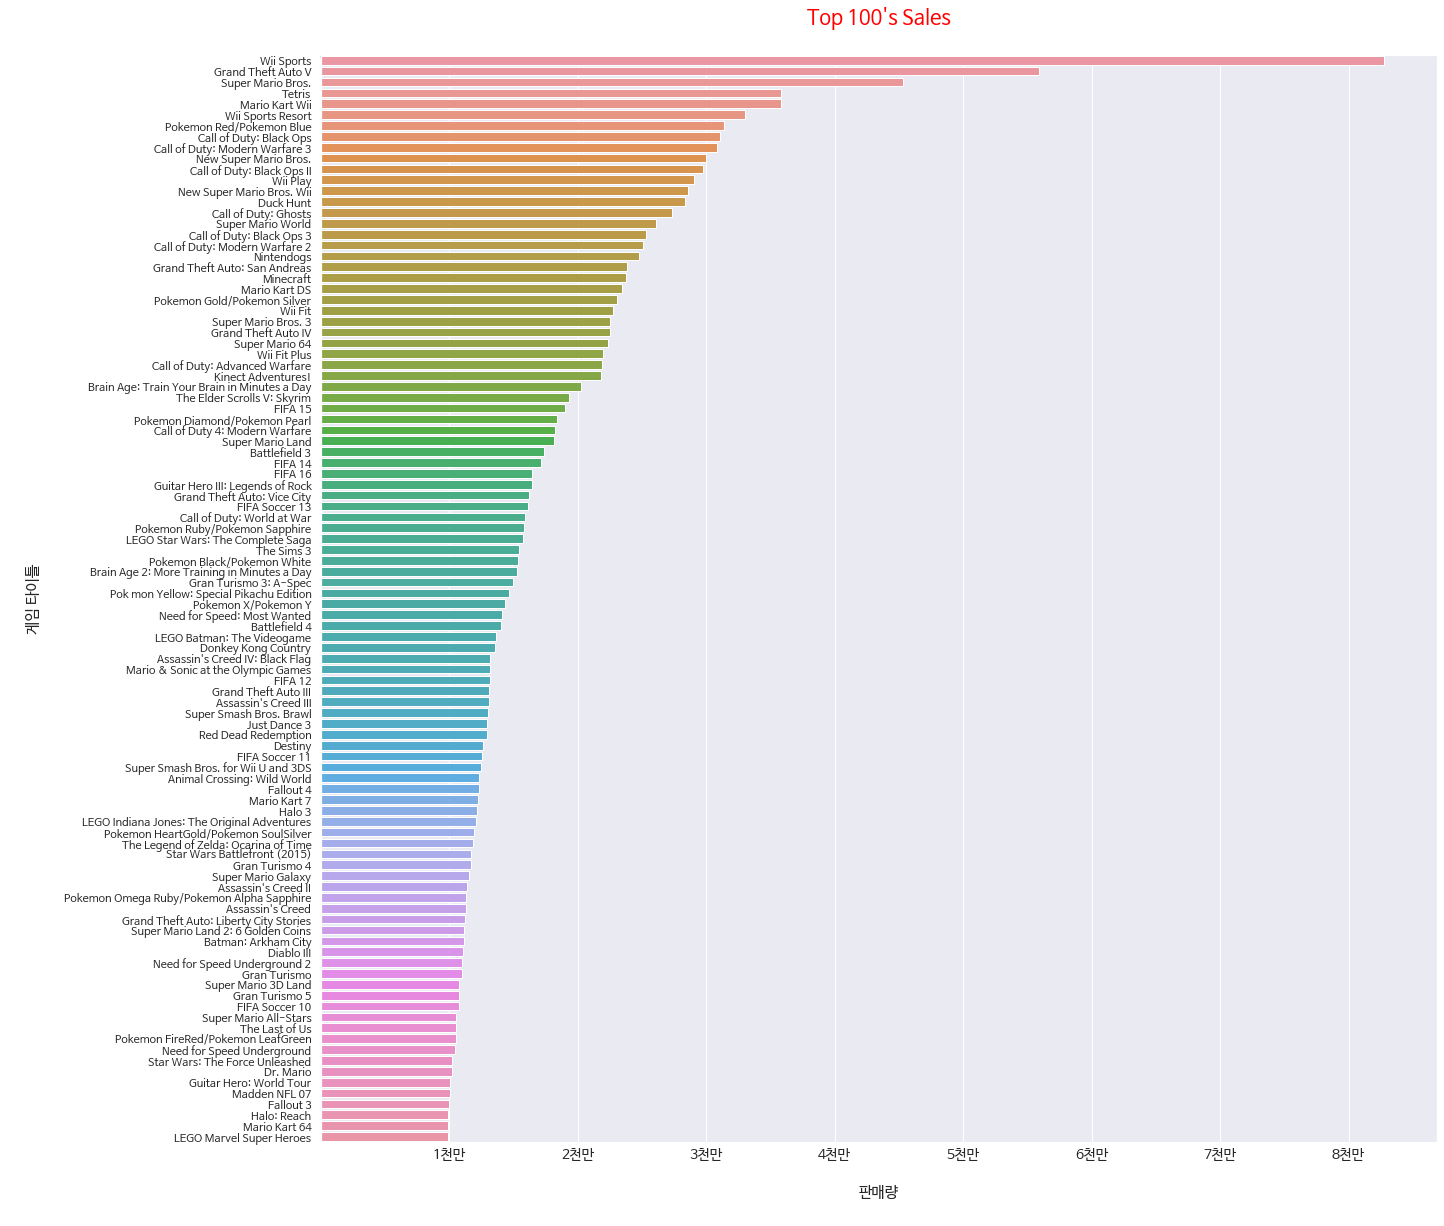

In [7]:
ticklist, labellist = [], []
for x in range(0,9) : 
  ticklist.append(x*(10**7))
  if (x == 0) :
    labellist.append('')
  else :
    labellist.append(str(x)+'천만')

plt.figure(figsize=(20, 20))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
sns.barplot(x = 'Total_Sales',
            y='Name',
            data=Top100)

plt.xticks(ticklist,labellist)
plt.rc('font', size=8)
plt.title("Top 100's Sales\n", fontsize=20, color = 'Red')
plt.xlabel('\n판매량\n', fontsize=15)
plt.ylabel('\n게임 타이틀\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)
plt.show()

#판매량 기준 Top 100을 장르별로 그룹화하고 지역별 판매량 및 전세계 판매량을 출력

In [13]:
region_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

pTop100s_Genre = pd.pivot_table(Top100,
                           index = 'Genre',
                           values = region_list,
                           aggfunc = ['sum'])
pTop100s_Genre.columns = ['EU_Sales','JP_Sales','NA_Sales','Other_Sales']
pTop100s_Genre =  pTop100s_Genre[region_list]
pTop100s_Genre['Mean_Sales'], pTop100s_Genre['Total_Sales'] = pTop100s_Genre[region_list].mean(axis=1), pTop100s_Genre[region_list].sum(axis=1)
pTop100s_Genre.reset_index(inplace=True)
pTop100s_Genre.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Mean_Sales,Total_Sales
0,Action,135380000.0,101330000.0,10670000.0,46680000.0,73515000.0,294060000.0
1,Adventure,11360000.0,6520000.0,2850000.0,1750000.0,5620000.0,22480000.0
2,Fighting,12580000.0,5020000.0,5880000.0,2020000.0,6375000.0,25500000.0
3,Misc,69780000.0,40830000.0,8520000.0,15110000.0,33560000.0,134240000.0
4,Platform,133370000.0,50840000.0,43700000.0,11450000.0,59840000.0,239360000.0


#Top 100 게임의 전세계 판매량을 장르별로 시각화

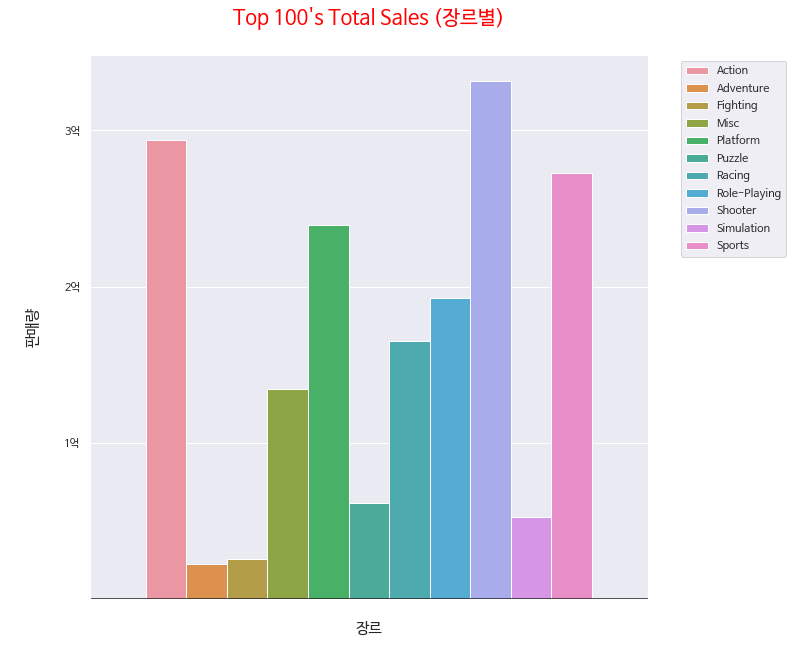

[]

In [14]:
Total_ = pTop100s_Genre[['Genre','Total_Sales']]
tdf_Vgame = pd.melt(Total_,["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()

plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=3.5,linestyles= '-', colors = '#000000')

sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]

for x in range(0,4) : 
  yticklist.append(x*(10**8))
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x)+'억')

plt.yticks(yticklist,ylabellist)
plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("Top 100's Total Sales (장르별)\n", fontsize=20, color = 'Red')
plt.xlabel('\n장르\n', fontsize=15)
plt.ylabel('\n판매량\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)


plt.show()   
xticklist

#Top 100 게임의 지역별 판매량과 지역별 평균 판매량을 장르별로 시각화

No handles with labels found to put in legend.


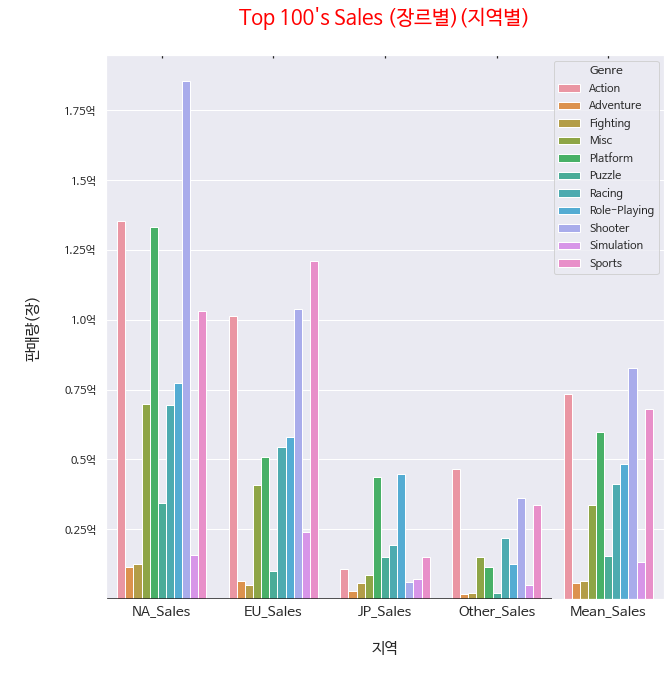

In [15]:
except_total = pTop100s_Genre.drop(['Total_Sales'],axis=1)
tdf_Vgame = pd.melt(except_total,["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()


plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=3.5,linestyles= '-', colors = '#000000')
lgnd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)

xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]

for x in range(0,8) : 
  yticklist.append(x*0.25*(10**8))
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*0.25)+'억')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("Top 100's Sales (장르별)(지역별)\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n판매량(장)\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)

#Top 100 게임의 지역별 판매량과 지역별 평균 판매량의 차이를 시각화

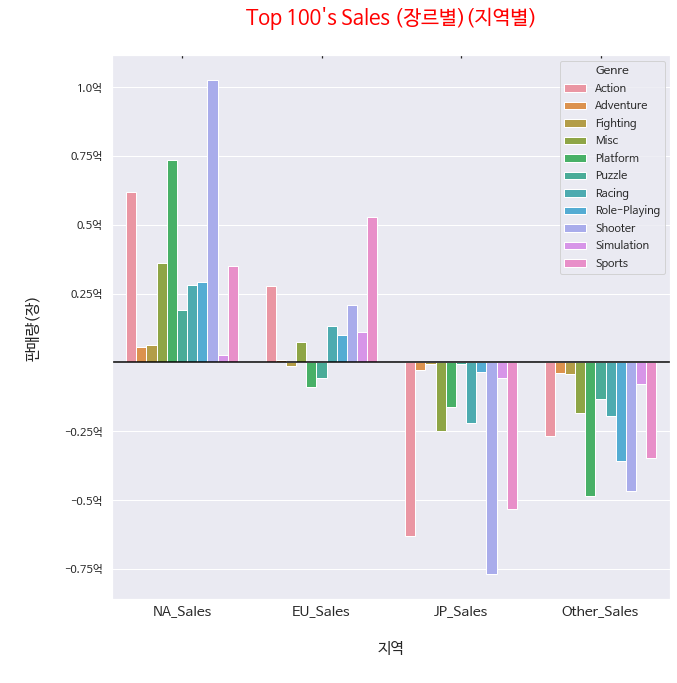

In [16]:
diff_pTop100s_Genre = pTop100s_Genre.drop(['Mean_Sales','Total_Sales'],axis=1)
for key in region_list :
  diff_pTop100s_Genre[key] = pTop100s_Genre[key] - pTop100s_Genre['Mean_Sales']
diff_pTop100s_Genre.head()

tdf_Vgame = pd.melt(diff_pTop100s_Genre,["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()

plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=3.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(-3,5) : 
  yticklist.append(x*0.25*(10**8))
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*0.25)+'억')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("Top 100's Sales (장르별)(지역별)\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n판매량(장)\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)

#Top 100의 지역별 점유율을 시각화

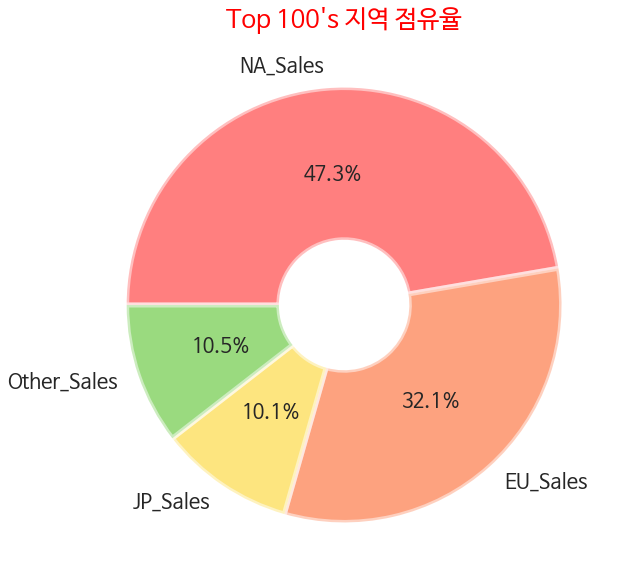

In [17]:
df_tmp = Top100[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

pTop100s_Region = pd.DataFrame(columns=df_tmp.columns)

df_tmp = df_tmp.reset_index(drop=True).T


list_num = []
for x in range(0,4):
  list_num.append(df_tmp.iloc[x,:].sum())

pTop100s_Region.loc[0] = list_num
pTop100s_Region.loc[1] = sum(list_num)
pTop100s_Region.loc[2] = list_num/sum(list_num)
pTop100s_Region.index = [['Region_sales','Total_sales','Per']]

#pTop100s_Region

labels2 = pTop100s_Region.columns
ratio2 = pTop100s_Region.iloc[2,:]
absvalue = pTop100s_Region.iloc[0,:]
color = ['#FF0000','#FC4700','#FCCC00','#36B700']
# color = ['#FCCC00','#CCFF66','#36B700','#008080']
plt.figure(figsize=(10, 10))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
npie = plt.pie(absvalue, labels=labels2, autopct='%.1f%%', startangle=180, colors = color ,counterclock=False, wedgeprops=wedgeprops, textprops={'fontsize': 20})
for x in range(len(npie[0])):
  npie[0][x].set_alpha(0.5)

plt.title("Top 100's 지역 점유율", fontsize=25, color = 'Red')
plt.show()

#※대부분의 판매량이 북미와 유럽에서 나오고 있음
# 북미 유럽을 주 시장으로 삼아야함.




 
 .

# 북미와 유럽에서 잘팔리는 장르가 무엇인가?
# 이러한 장르를 만들면 잘팔리겠다.

.
.
.
.
# 매출액 상위 100개를 제외한 북미 유럽 시장에서의 판매량 집계 및 시각화

,Genre,EX_EU_Sales,EX_NA_Sales,EX_NA_EU_Sales,EX_NA_EU_Sales_Per
0,Action,414330000.0,727970000.0,1.142300e+09,0.213400
1,Adventure,57550000.0,94300000.0,1.518500e+08,0.028368
2,Fighting,96020000.0,210350000.0,3.063700e+08,0.057235
3,Misc,171530000.0,338140000.0,5.096700e+08,0.095214
4,Platform,150780000.0,313160000.0,4.639400e+08,0.086671
5,Puzzle,40860000.0,88940000.0,1.298000e+08,0.024249
6,Racing,183510000.0,288970000.0,4.724800e+08,0.088267
7,Role-Playing,125400000.0,242180000.0,3.675800e+08,0.068670
8,Shooter,209510000.0,397180000.0,6.066900e+08,0.113339
9,Simulation,89260000.0,167060000.0,2.563200e+08,0.047885


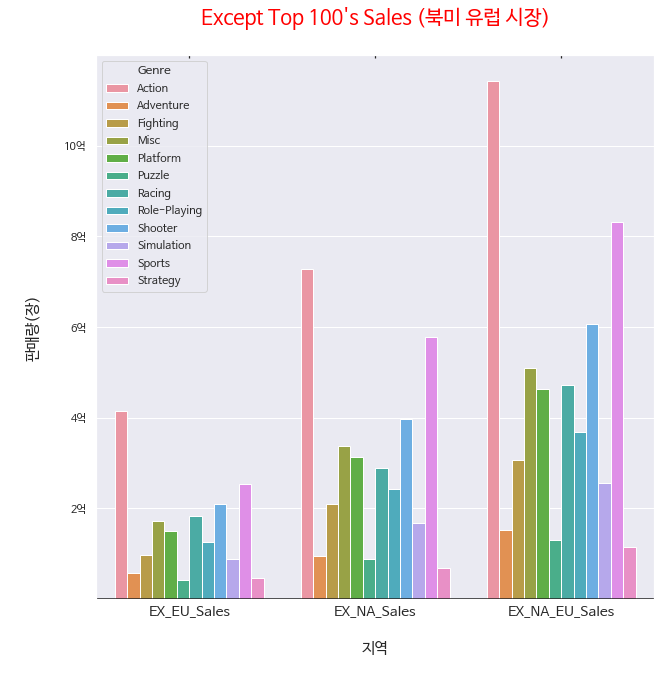

In [18]:
ExceptTop100s_NA_EU = df_VagmeEDA.sort_values(by=['Total_Sales'], ascending= False)[100:]

pExceptTop100s_NA_EU = pd.pivot_table(ExceptTop100s_NA_EU,
                           index = 'Genre',
                           values = ['NA_Sales','EU_Sales'],
                           aggfunc = ['sum'])

pExceptTop100s_NA_EU.columns = ['EX_EU_Sales','EX_NA_Sales']
pExceptTop100s_NA_EU['EX_NA_EU_Sales'] = pExceptTop100s_NA_EU[['EX_NA_Sales','EX_EU_Sales']].sum(axis=1)
pExceptTop100s_NA_EU.reset_index(inplace=True)
pExceptTop100s_NA_EU['EX_NA_EU_Sales_Per'] = pExceptTop100s_NA_EU['EX_NA_EU_Sales'] / pExceptTop100s_NA_EU['EX_NA_EU_Sales'].sum()
#pExceptTop100s_NA_EU = pExceptTop100s_NA_EU[['EX_NA_Sales','EX_EU_Sales','EX_NA_EU_Sales','EX_NA_EU_Sales_Per']]
#pExceptTop100s_NA_EU = pExceptTop100.sort_values(by=['EX_NA_EU_Sales_Per'], ascending= False).reset_index()
pExceptTop100s_NA_EU
column_list = pExceptTop100s_NA_EU['Genre'].to_list()


tdf_Vgame = pd.melt(pExceptTop100s_NA_EU.drop(['EX_NA_EU_Sales_Per'],axis=1),["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()


plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=3.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(0,6) : 
  yticklist.append(x*0.2*(10**9))
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*2)+'억')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("Except Top 100's Sales (북미 유럽 시장)\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n판매량(장)\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)
pExceptTop100s_NA_EU

# 판매량을 점유율로 변환해 시각화


,Genre,EX_EU_Sales,EX_NA_Sales,EX_NA_EU_Sales,EX_NA_EU_Sales_Per
0,Action,414330000.0,727970000.0,1.142300e+09,0.213400
1,Adventure,57550000.0,94300000.0,1.518500e+08,0.028368
2,Fighting,96020000.0,210350000.0,3.063700e+08,0.057235
3,Misc,171530000.0,338140000.0,5.096700e+08,0.095214
4,Platform,150780000.0,313160000.0,4.639400e+08,0.086671
5,Puzzle,40860000.0,88940000.0,1.298000e+08,0.024249
6,Racing,183510000.0,288970000.0,4.724800e+08,0.088267
7,Role-Playing,125400000.0,242180000.0,3.675800e+08,0.068670
8,Shooter,209510000.0,397180000.0,6.066900e+08,0.113339
9,Simulation,89260000.0,167060000.0,2.563200e+08,0.047885


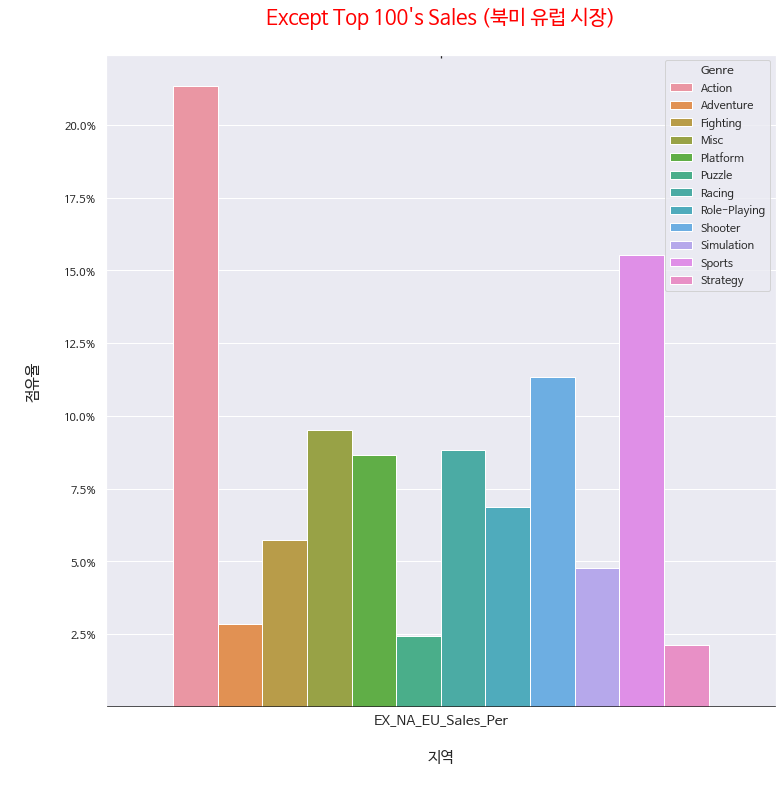

In [19]:
tdf_Vgame = pd.melt(pExceptTop100s_NA_EU[['Genre','EX_NA_EU_Sales_Per']],["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()


plt.figure(figsize=(12, 12))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=3.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(0,9) : 
  yticklist.append(x*0.025)
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*2.5)+'%')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("Except Top 100's Sales (북미 유럽 시장)\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n점유율\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)
pExceptTop100s_NA_EU

#

 # 북미 유럽 시장에서의 매출액 상위 100개 게임의 판매량 집계 및 시각화

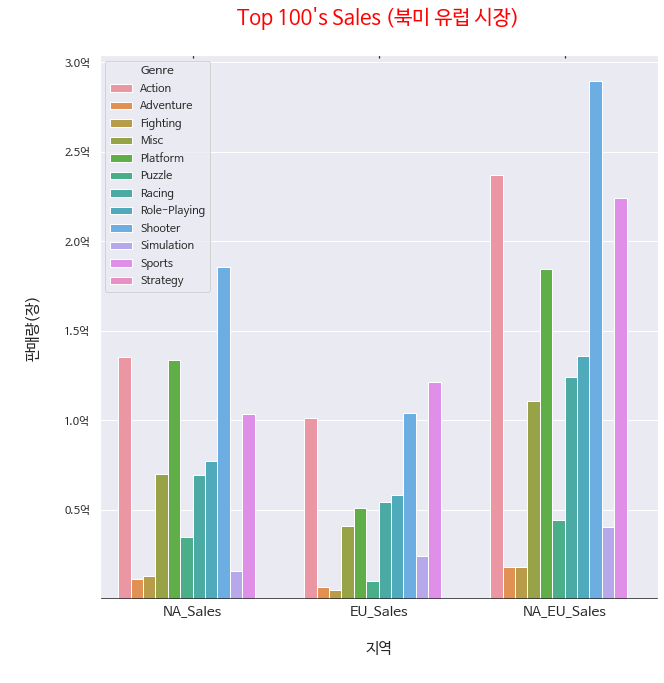

In [20]:
pTop100s_NA_EU = pd.pivot_table(Top100,
                           index = 'Genre',
                           values =  ['NA_Sales','EU_Sales'],
                           aggfunc = ['sum'])

pTop100s_NA_EU.columns = ['EU_Sales','NA_Sales']
pTop100s_NA_EU = pTop100s_NA_EU[['NA_Sales','EU_Sales']]
pTop100s_NA_EU['NA_EU_Sales'] = pTop100s_NA_EU[['NA_Sales','EU_Sales']].sum(axis=1)
pTop100s_NA_EU.reset_index(inplace=True)
pTop100s_NA_EU['NA_EU_Sales_Per'] = pTop100s_NA_EU['NA_EU_Sales'] / pTop100s_NA_EU['NA_EU_Sales'].sum()
new_data = {'Genre':'Strategy'}
pTop100s_NA_EU = pTop100s_NA_EU.append(new_data, ignore_index=True)

pTop100s_NA_EU

tdf_Vgame = pd.melt(pTop100s_NA_EU.drop(['NA_EU_Sales_Per'],axis=1),["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()


plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=3.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(0,7) : 
  yticklist.append(x*0.5*(10**8))
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*0.5)+'억')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("Top 100's Sales (북미 유럽 시장)\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n판매량(장)\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)

# 판매량을 점유율로 변환해 시각화

,Genre,NA_Sales,EU_Sales,NA_EU_Sales,NA_EU_Sales_Per
0,Action,135380000.0,101330000.0,236710000.0,0.166207
1,Adventure,11360000.0,6520000.0,17880000.0,0.012555
2,Fighting,12580000.0,5020000.0,17600000.0,0.012358
3,Misc,69780000.0,40830000.0,110610000.0,0.077665
4,Platform,133370000.0,50840000.0,184210000.0,0.129344
5,Puzzle,34410000.0,9870000.0,44280000.0,0.031091
6,Racing,69550000.0,54390000.0,123940000.0,0.087025
7,Role-Playing,77360000.0,58180000.0,135540000.0,0.095170
8,Shooter,185420000.0,103810000.0,289230000.0,0.203084
9,Simulation,15900000.0,24120000.0,40020000.0,0.028100


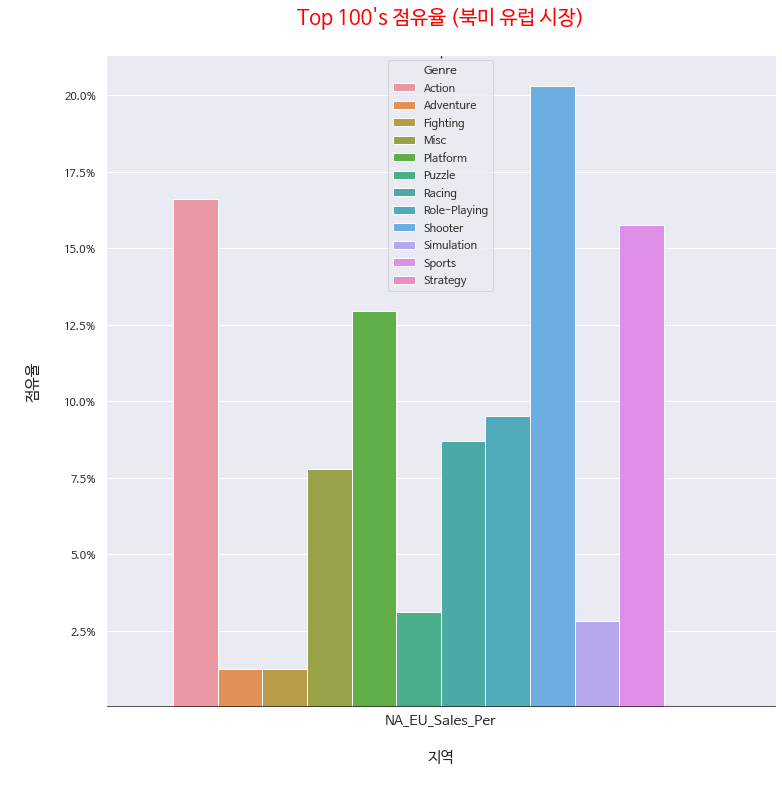

In [21]:
tdf_Vgame = pd.melt(pTop100s_NA_EU[['Genre','NA_EU_Sales_Per']],["Genre"], var_name="Region", value_name="Sales")
tdf_Vgame.head()


plt.figure(figsize=(12, 12))
sns.set_theme(style="darkgrid", font = 'NanumBarunGothic', font_scale= 1)
plt.hlines(y = 0, xmin=-0.5,xmax=3.5,linestyles= '-', colors = '#000000')
sns.barplot(x = 'Region',
            y='Sales',
            hue="Genre",
            data=tdf_Vgame)
xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(0,9) : 
  yticklist.append(x*0.025)
  if (x == 0) :
    ylabellist.append('')
  else :
    ylabellist.append(str(x*2.5)+'%')
    
plt.yticks(yticklist,ylabellist)
# plt.xticks(xticklist,xlabellist)
plt.rc('font', size=8)
plt.title("Top 100's 점유율 (북미 유럽 시장)\n", fontsize=20, color = 'Red')
plt.xlabel('\n지역\n', fontsize=15)
plt.ylabel('\n점유율\n', fontsize=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, top=True)
pTop100s_NA_EU

#북미 유럽 시장 기대율 Data를 시각화를 위해
## X축을 상위 100개 게임(샘플)을 제외한 전체 판매량으로 설정 Y축을 상위 100개 게임(샘플)의 점유율(가중치)로 설정
##[※] X * Y 의 값에 따라 마크 크기를 설정해 DataFrame으로 저장

In [23]:
pExceptTop100s_NA_EU = pExceptTop100s_NA_EU.sort_values(by=['EX_NA_EU_Sales'], ascending= False)[:100]
Trend = pd.merge(pExceptTop100s_NA_EU, pTop100s_NA_EU, on='Genre')
Trend = Trend.fillna(0)


TrendPlot = Trend.copy()
TrendPlot = TrendPlot[['Genre','EX_NA_EU_Sales','NA_EU_Sales','NA_EU_Sales_Per']]
TrendPlot['MarkSize'] = (TrendPlot['EX_NA_EU_Sales'] * (1+TrendPlot['NA_EU_Sales_Per']))
ratio = 250 / TrendPlot['MarkSize'].max()
TrendPlot['MarkSize'] = round(TrendPlot['MarkSize'] * ratio)
TrendPlot['Color'] = ['#FF0000','#FC4700','#FCCC00','#36B700','#008000','#008080','#003A9A','#4D019A','#80007F','#E80074','#0611F2','#000000']
TrendPlot

,Genre,EX_NA_EU_Sales,NA_EU_Sales,NA_EU_Sales_Per,MarkSize,Color
0,Action,1.142300e+09,236710000.0,0.166207,250.0,#FF0000
1,Sports,8.319000e+08,224170000.0,0.157402,181.0,#FC4700
2,Shooter,6.066900e+08,289230000.0,0.203084,137.0,#FCCC00
3,Misc,5.096700e+08,110610000.0,0.077665,103.0,#36B700
4,Racing,4.724800e+08,123940000.0,0.087025,96.0,#008000
5,Platform,4.639400e+08,184210000.0,0.129344,98.0,#008080
6,Role-Playing,3.675800e+08,135540000.0,0.095170,76.0,#003A9A
7,Fighting,3.063700e+08,17600000.0,0.012358,58.0,#4D019A
8,Simulation,2.563200e+08,40020000.0,0.028100,49.0,#80007F
9,Adventure,1.518500e+08,17880000.0,0.012555,29.0,#E80074


#북미 유럽 시장 기대율 Data를 시각화


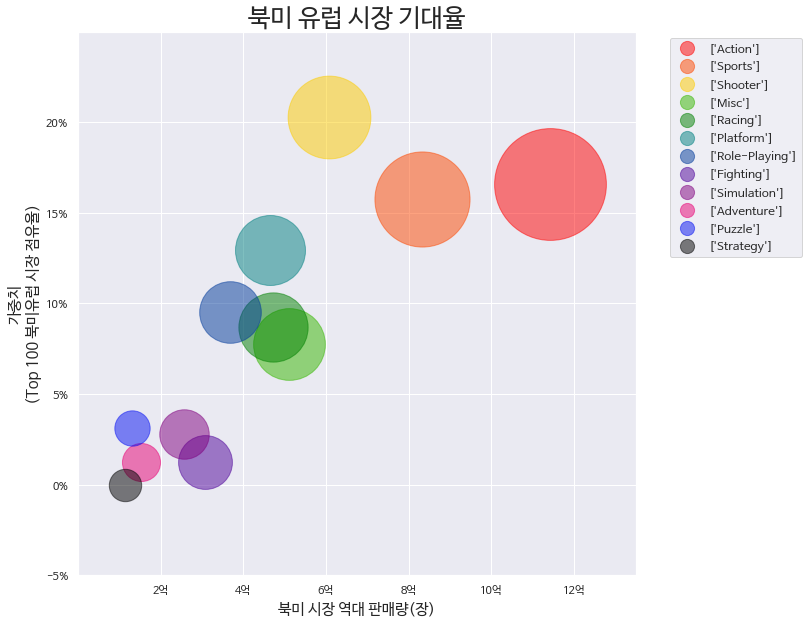

In [24]:
x, y, size, colors = TrendPlot['EX_NA_EU_Sales'],TrendPlot['NA_EU_Sales_Per'],TrendPlot['MarkSize'],TrendPlot['Color']
fig, ax = plt.subplots(figsize=(10, 10))

p0 = plt.scatter(x[0], y[0], alpha=0.5, s=size[0]*50, c=colors[0], label = TrendPlot.loc[0:0,'Genre'].values)
p1 = plt.scatter(x[1], y[1], alpha=0.5, s=size[1]*50, c=colors[1], label = TrendPlot.loc[1:1,'Genre'].values)
p2 = plt.scatter(x[2], y[2], alpha=0.5, s=size[2]*50, c=colors[2], label = TrendPlot.loc[2:2,'Genre'].values)
p3 = plt.scatter(x[3], y[3], alpha=0.5, s=size[3]*50, c=colors[3], label = TrendPlot.loc[3:3,'Genre'].values)
p4 = plt.scatter(x[4], y[4], alpha=0.5, s=size[4]*50, c=colors[4], label = TrendPlot.loc[4:4,'Genre'].values)
p5 = plt.scatter(x[5], y[5], alpha=0.5, s=size[5]*50, c=colors[5], label = TrendPlot.loc[5:5,'Genre'].values)
p6 = plt.scatter(x[6], y[6], alpha=0.5, s=size[6]*50, c=colors[6], label = TrendPlot.loc[6:6,'Genre'].values)
p7 = plt.scatter(x[7], y[7], alpha=0.5, s=size[7]*50, c=colors[7], label = TrendPlot.loc[7:7,'Genre'].values)
p8 = plt.scatter(x[8], y[8], alpha=0.5, s=size[8]*50, c=colors[8], label = TrendPlot.loc[8:8,'Genre'].values)
p9 = plt.scatter(x[9], y[9], alpha=0.5, s=size[9]*50, c=colors[9], label = TrendPlot.loc[9:9,'Genre'].values)
p10 = plt.scatter(x[10], y[10], alpha=0.5, s=size[10]*50, c=colors[10], label = TrendPlot.loc[10:10,'Genre'].values)
p11 = plt.scatter(x[11], y[11], alpha=0.5, s=size[11]*50, c=colors[11], label = TrendPlot.loc[11:11,'Genre'].values)

xticklist, yticklist,xlabellist, ylabellist = [], [],[],[]
for x in range(-1,5) : 
  yticklist.append(x*0.05)
  #if (x == 0) :
    #ylabellist.append('')
  #else :
  ylabellist.append(str(x*5)+'%')

for x in range(0,7) : 
  xticklist.append(x*0.2*(10**9))
  if (x == 0) :
    xlabellist.append('')
  else :
    xlabellist.append(str(x*2)+'억')

plt.xlim(0,1.35*10**9)
plt.ylim(-0.05, 0.25)

plt.xticks(xticklist,xlabellist)
plt.yticks(yticklist,ylabellist)

plt.rcParams['legend.fontsize'] = 12
plt.xlabel("북미 시장 역대 판매량(장)",fontsize=15)
plt.ylabel("가중치\n(Top 100 북미유럽 시장 점유율)",fontsize=15)
plt.title("북미 유럽 시장 기대율",fontsize=25)
lgnd = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
for x in range(0,len(TrendPlot.index)) :
  lgnd.legendHandles[x]._sizes = [200]

## 100개 게임(샘플)을 제외한 전체 판매량 * (상위 100개 게임(샘플)의 점유율)
## = 기존 데이터 * 가중치 = 마크크기(원 크기)
##-> 마크 크기(원 크기)가  가장 큰 Action장르를 아이템으로 선정해야함.